<a href="https://colab.research.google.com/github/KonstantinPhD/Student/blob/master/The_first_HomeWork_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Задание №1.
> Допустим, что в ходе испытаний проводили наблюдения за температурой исследуемой среды. Наблюдения в течение 20-ти часов дали следующие результаты:
16,14,5,13,8,15,10,8, 91, 71, 3, 13, 18, 15, 110, 18, 19,16,14,5,13,8,15,10,8, 91, 71, 3, 13, 18, 15, 110, 18, 19.
> Требуется разработать на языке Python программу для вычисления и построения по этим результатам статистического дискретного ряда распределения частот и относительных частот. 


### Подключим несколько "стандартных" библиотек.

In [85]:
import pandas as pd;              #Библиотека для работы с данными.
import numpy as np;               #Библиотека для работы с математическими функциями.
import matplotlib.pyplot as plt;  #Библиотека для работы с графиками, средства визуализации.

### Сформируем массив данных, а также выполним ранжирование ряда, т.е. отсортируем значения ряда по возростанию, используя библиотеку pandas.
>Напомним, что для обращения к библиотеке и ее функциям используется знак "." (точка (dot)). Например, запись вида pd.DataFrane означает, что необходимо обратиться к библиотеке pandas, которую мы обозначили как pd и из этой библиотеки вызвать функцию DataFrame(), которая используется для создания структурированной формы с данными в виде специальной таблицы.  Детали можно прочитать на официальном сайте в разделе документации. https://pandas.pydata.org/ 

In [120]:
A=[16,14,5,13,8,15,10,8, 1, 1, 3, 13, 18, 15, 11, 18, 19,16,14,5,13,8,15,10,8, 1, 1, 3, 13, 18, 15, 10, 18, 19,1];
df=pd.DataFrame({"Data":A});# Создадим массив данных в формате DataFrame.
print("****************************")
print(df.head(3)); #Выведим на печать 3  первых значения.
print("****************************")
df.head(2) #Можно и так тоже реализовать вывод данных на печать, НО!! тоолько в блокноте!

****************************
   Data
0    16
1    14
2     5
****************************


,Data
0,16
1,14


### Для решения задачи визуализации данных воспользуемся библитекой matplotlib.pyplot. 

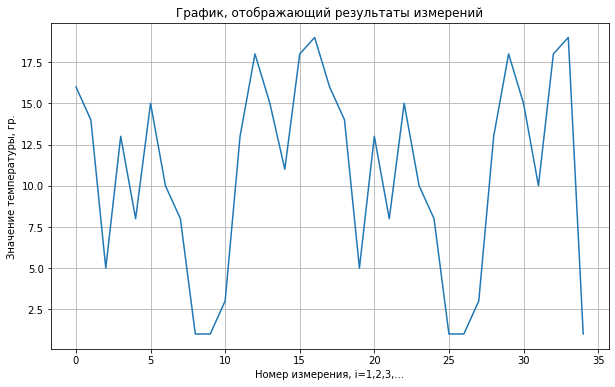

In [101]:
plt.figure(figsize=(10,6));
plt.plot(df.Data); #Построим график, отображающий результаты измерений и посмотрим на данные.
plt.xlabel("Номер измерения, i=1,2,3,...");
plt.ylabel("Значение температуры, гр.");
plt.title("График, отображающий результаты измерений");
plt.grid(); 
plt.show();

In [102]:
#Отсортируем массив.
df=df.sort_values(by="Data");
df.head()

,Data
34,1
25,1
9,1
8,1
26,1


### Для построения полигона частот необходимо подсчитать количество повторений каждого уникального измерения, т.е. вычислить частоту появления каждого уникального измерения, например, визуально видно, что количество повторений результата измерений "3" равно двум. Для решения указанной задачи применим функцию GroupBy.count() из пакета pandas к нашему дата-фрейму df, которая позволяет сгруппировать данные и вычислить количество элементов в каждой группе.

In [103]:
df["frequency"]=0;
df2=df.groupby(by="Data").count();
t=np.linspace(1,len(df2),len(df2));
df2.set_index(t)
df2.head(3)

,frequency
Data,
1,5
3,2
5,2


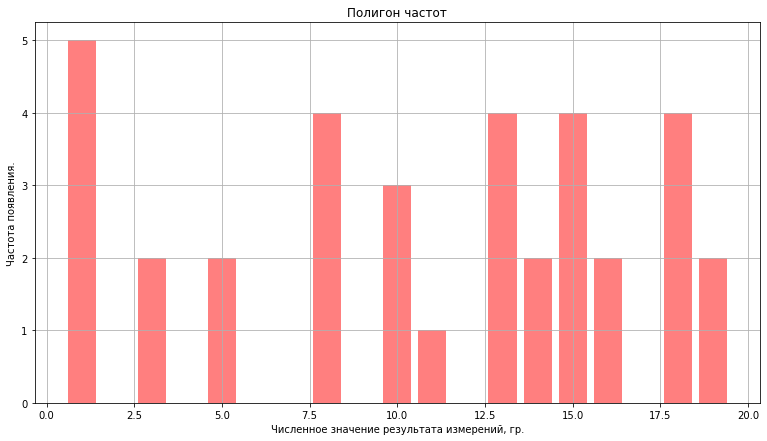

In [117]:
plt.figure(figsize=(13,7));
plt.bar(df2.index,df2.frequency, color="red",alpha=0.5); #Построим график, отображающий результаты измерений и посмотрим на данные.
plt.xlabel("Численное значение результата измерений, гр.");
plt.ylabel("Частота появления.");
plt.title("Полигон частот");
plt.grid(); 
plt.show();

### Построим относительный полигон частот. Для расчета относительных частот воспользуемся следующим вырожением:
$
$$w_i=\frac{n_i}{\sum_{k=1}^{l}n_k}$$
$

т.е. каждое отдельное значение частоты появления события $n_i$ разделим на сумму всех частот $\sum_{k=1}^{l}n_k$.

In [118]:
df2["relative frequency"]=df2.frequency/df2.frequency.sum();
if df2["relative frequency"].sum() !=1: print("We have error")
df2.head()

,frequency,relative frequency
Data,,
1,5,0.142857
3,2,0.057143
5,2,0.057143
8,4,0.114286
10,3,0.085714


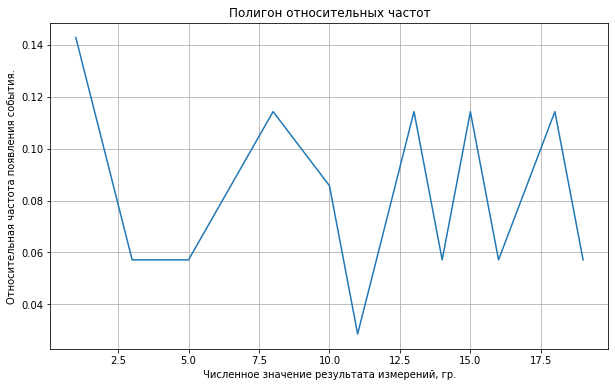

In [119]:
plt.figure(figsize=(10,6));
plt.plot(df2["relative frequency"]); #Построим график, отображающий результаты измерений и посмотрим на данные.
plt.xlabel("Численное значение результата измерений, гр.");
plt.ylabel("Относительная частота появления события.");
plt.title("Полигон относительных частот");
plt.grid(); 
plt.show();

## Контрольные задания
1. Проводились наблюдения за температурой исследуемой среды. Наблюдения в течение 20-ти часов дали следующие результаты: 
6; 4; 5; 3; 8; 5; 10; 8; 9; 7; 3; 3; 8; 5; 10; 8; 9; 7; 3; 5; 10; 11; 5; 10; 11; 6; 7; 3; 8; 5; 10; 8; 9; 7; 3; 5; 10; 11; 9; 12; 10; 3; 8; 5; 10; 8; 9; 7; 3; 5; 10; 11;8.
Написать на метаязыке Python программу для вычисления и построения по этим результатам статистического дискретного ряда распределения частот и относительных частот. Построить полигоны частот и относительных частот, используя ППО Python.

2. На телефонной станции проводились наблюдения над числом неправильных соединений в минуту. Наблюдения в течение часа дали следующие результаты: 
3; 1; 3; 1; 4; 2; 2; 4; 0; 3; 0; 2; 2; 0; 2; 3; 8; 5; 10; 8; 9; 7; 3; 5; 10; 11; 1; 4; 3; 3; 3; 8; 5; 10; 8; 9; 7; 3; 8; 5; 10; 8; 9; 7; 3; 5; 10; 11;3; 5; 10; 11;1.
Написать на метаязыке Python программу для вычисления и построения по этим результатам статистического дискретного ряда распределения частот и относительных частот. Построить полигоны частот и относительных частот, используя ППО Python.

3. На сервере виртуального предприятия проводились наблюдения над числом запросов в единице времени. Наблюдения в течение 20 часов дали следующие результаты: 
20; 25; 30; 15; 10; 27; 14; 21; 23; 25; 27; 24; 24; 20; 15; 12; 11; 9; 14; ; 15; 10; 27; 14; 21; 23; 25; ; 15; 10; 27; 14; 21; 23; 25; ; 15; 10; 27; 14; 21; 23; 25; 3; 1; 3; 1; 4; 2; 2; 4; 0; 3; 0; 2; 2; 0; 2; 3; 10. 
Написать на метаязыке Python программу для вычисления и построения по этим результатам статистического дискретного ряда распределения частот и относительных частот. Построить полигоны частот и относительных частот, используя ППО Python.
4. На сервере виртуального предприятия проводились наблюдения над числом запросов в единице времени. Наблюдения в течение 20 часов дали следующие результаты: 
200; 250; 300; 150; 100; 270; 140; 210; 230; 250; 270; 240; 204; 200; 105; 102; 110; 90; 104; ; 105; 100; 207; 104; 201; 203; 205; ; 105; 100; 207; 104; 201; 203; 205; 150; 100; 207; 104; 201; 203; 205; 3; 10; 3; 10; 40; 20; 20; 40; 200; 300; 300; 200; 200; 300; 200; 300; 100. 
Написать на метаязыке Python программу для вычисления и построения по этим результатам статистического дискретного ряда распределения частот и относительных частот. Построить полигоны частот и относительных частот, используя ППО Python.
5. На сервере виртуального предприятия проводились наблюдения над числом запросов в единице времени. Наблюдения в течение 20 часов дали следующие результаты: 
20; 50; 300; 150; 100; 270; 140; 210; 230; 250; 270; 240; 204; 200; 105; 102; 110; 0; 104; 15; 10; 27; 14; 21; 23; 25; ; 15; 10; 27; 14; 21; 23; 5; 50; 10; 207; 104; 201; 203; 205; 3; 10; 3; 10; 40; 20; 20; 40; 110; 30; 200; 300; 100. 
Написать на метаязыке Python программу для вычисления и построения по этим результатам статистического дискретного ряда распределения частот и относительных частот. Построить полигоны частот и относительных частот, используя ППО Python.
6. Проводились наблюдения за температурой исследуемой среды. Наблюдения в течение 20-ти часов дали следующие результаты: 
6; 4; 5; 13; 8; 15; 10; 8; 91; 71; 3; 13; 18; 15; 110; 18; 19; 17; 13; 5; 10; 11; 5; 10; 11; 6; 7; 3; 8; 5; 10; 8; 9; 7; 3; 5; 10; 11; 9; 12; 10; 3; 18; 5; 150; 18; 9; 7; 3; 5; 10; 11;58.
Написать на метаязыке Python программу для вычисления и построения по этим результатам статистического дискретного ряда распределения частот и относительных частот. Построить полигоны частот и относительных частот, используя ППО Python.
7. Проводились наблюдения за температурой исследуемой среды. Наблюдения в течение 20-ти часов дали следующие результаты: 
16; 14; 5; 13; 8; 15; 10; 8; 91; 71; 3; 13; 18; 15; 110; 18; 19; 17; 13; 5; 10; 11; 5; 10; 115; 65; 75; 35; 85; 55; 150; 85; 95; 75; 35; 55; 150; 151; 95; 12; 10; 3; 18; 5; 150; 18; 9; 7; 3; 5; 10; 11;58.
Написать на метаязыке Python программу для вычисления и построения по этим результатам статистического дискретного ряда распределения частот и относительных частот. Построить полигоны частот и относительных частот, используя ППО Python.
8. Проводились наблюдения за температурой исследуемой среды. Наблюдения в течение 20-ти часов дали следующие результаты: 
106; 142; 52; 123; 82; 152; 120; 82; 921; 721; 32; 123; 128; 125; 1120; 128; 129; 127; 123; 52; 120; 121; 52; 120; 115; 65; 752; 325; 825; 525; 1520; 825; 925; 725; 325; 525; 150; 151; 925; 122; 10; 32; 18; 52; 150; 18; 9; 7; 3; 5; 10; 11;58.
Написать на метаязыке Python программу для вычисления и построения по этим результатам статистического дискретного ряда распределения частот и относительных частот. Построить полигоны частот и относительных частот, используя ППО Python.
9. Проводились наблюдения за температурой исследуемой среды. Наблюдения в течение 20-ти часов дали следующие результаты: 
16; 42; 52; 23; 82; 12; 12; 82; 21; 21; 32; 12; 12; 125; 20; 12; 12; 127; 12; 52; 12; 21; 52; 12; 15; 65; 72; 35; 25; 25; 15; 25; 25; 25; 25; 25; 50; 151; 25; 12; 10; 32; 18; 52; 15; 18; 9; 7; 3; 5; 10; 11;58.
Написать на метаязыке Python программу для вычисления и построения по этим результатам статистического дискретного ряда распределения частот и относительных частот. Построить полигоны частот и относительных частот, используя ППО Python.
10. Проводились наблюдения за температурой исследуемой среды. Наблюдения в течение 20-ти часов дали следующие результаты: 
160; 420; 520; 230; 820; 120; 120; 820; 210; 210; 320; 120; 120; 125; 200; 120; 120; 127; 102; 502; 102; 201; 502; 102; 105; 605; 72; 305; 205; 205; 105; 205; 205; 205; 205; 205; 500; 151; 250; 102; 100; 302; 108; 502; 105; 108; 90; 70; 300; 500; 100; 101;508.
Написать на метаязыке Python программу для вычисления и построения по этим результатам статистического дискретного ряда распределения частот и относительных частот. Построить полигоны частот и относительных частот, используя ППО Python.
